In [1]:
import pandas as pd
import numpy as np

np.__version__

'1.19.5'

## Load data: let's start by just trying the 2D and see if it's good enough (from the viz, I'm guessing we'll want at least 5 dimensions to really capture similaritiy, tho...)

In [2]:
lyric_lines_ready_for_analysis = pd.read_csv('./data/3 OUTPUT One lyric lines per row, cleaned.csv')

In [3]:
lyric_lines_ready_for_analysis

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41


### ⚠️ Loading 1 Gig, this should be slow ⚠️ 

In [4]:
message_embeddings_df = pd .read_csv('./data/4 OUTPUT 1d embeddings array.csv')
message_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.002448,-0.006144,-0.040928,-0.015099,0.000150,0.006566,0.039014,0.031581,0.039477,-0.020835,...,0.068633,0.010269,-0.014108,0.013764,-0.003254,-0.022148,-0.012551,-0.069721,-0.024095,-0.051011
1,-0.020579,0.016060,0.041853,0.015500,-0.010827,-0.013930,0.013164,-0.047087,0.033838,0.041109,...,-0.047296,0.016397,-0.076041,-0.024282,-0.036025,-0.027170,-0.038159,0.055621,0.067790,0.034361
2,-0.015094,-0.006433,0.014353,-0.013223,-0.046794,0.040840,-0.015416,-0.037821,-0.030475,-0.007043,...,0.032886,-0.052762,-0.024700,-0.091697,0.052754,-0.067762,0.012295,-0.058588,0.047908,-0.021352
3,-0.117747,-0.041903,-0.012537,0.030007,-0.015900,-0.003041,-0.067819,-0.047314,0.007004,0.041440,...,-0.030527,0.026838,-0.034646,0.008963,0.049549,-0.044417,-0.057669,0.043328,0.049226,0.008116
4,0.032745,-0.043692,0.053045,0.050328,-0.010547,0.006445,-0.019568,-0.074121,0.074195,-0.044683,...,-0.008463,-0.026073,-0.025741,-0.008665,-0.026599,-0.026849,0.021338,-0.069308,-0.044292,-0.008158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167355,0.069946,0.025872,-0.052863,0.105396,-0.031138,0.026127,0.038499,0.002888,-0.034377,-0.049539,...,0.039111,0.001513,-0.010167,-0.021516,0.014628,-0.089937,0.006847,0.057478,0.000188,-0.020785
167356,-0.055095,0.020369,-0.016676,0.018666,0.051288,0.071585,0.018204,0.045787,0.038067,-0.045270,...,0.073949,0.081896,-0.001522,0.032019,-0.053496,-0.053315,-0.042497,0.030564,0.039444,0.032298
167357,-0.019677,0.010472,-0.024140,-0.001454,0.023227,-0.020215,-0.020753,0.056700,0.050644,-0.082072,...,0.108221,0.085725,-0.020897,-0.051127,-0.054858,0.031241,-0.046810,0.014357,-0.029354,-0.021072
167358,0.033893,0.008252,-0.014001,-0.012160,0.014208,0.053781,0.056732,0.002518,-0.053152,0.016452,...,0.086646,-0.028210,-0.063976,0.092406,0.012750,0.014385,-0.009993,-0.025804,0.011054,0.015994


In [5]:
lyrics_with_embedding = pd.concat([message_embeddings_df, lyric_lines_ready_for_analysis], axis=1)
lyrics_with_embedding

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,0.002448,-0.006144,-0.040928,-0.015099,0.000150,0.006566,0.039014,0.031581,0.039477,-0.020835,...,-0.069721,-0.024095,-0.051011,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97
1,-0.020579,0.016060,0.041853,0.015500,-0.010827,-0.013930,0.013164,-0.047087,0.033838,0.041109,...,0.055621,0.067790,0.034361,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,-0.015094,-0.006433,0.014353,-0.013223,-0.046794,0.040840,-0.015416,-0.037821,-0.030475,-0.007043,...,-0.058588,0.047908,-0.021352,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97
3,-0.117747,-0.041903,-0.012537,0.030007,-0.015900,-0.003041,-0.067819,-0.047314,0.007004,0.041440,...,0.043328,0.049226,0.008116,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,0.032745,-0.043692,0.053045,0.050328,-0.010547,0.006445,-0.019568,-0.074121,0.074195,-0.044683,...,-0.069308,-0.044292,-0.008158,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167355,0.069946,0.025872,-0.052863,0.105396,-0.031138,0.026127,0.038499,0.002888,-0.034377,-0.049539,...,0.057478,0.000188,-0.020785,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41
167356,-0.055095,0.020369,-0.016676,0.018666,0.051288,0.071585,0.018204,0.045787,0.038067,-0.045270,...,0.030564,0.039444,0.032298,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41
167357,-0.019677,0.010472,-0.024140,-0.001454,0.023227,-0.020215,-0.020753,0.056700,0.050644,-0.082072,...,0.014357,-0.029354,-0.021072,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41
167358,0.033893,0.008252,-0.014001,-0.012160,0.014208,0.053781,0.056732,0.002518,-0.053152,0.016452,...,-0.025804,0.011054,0.015994,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41


## Let's try reducing dimensionality (but all the way to 2D, too much loss)

In [86]:
message_embeddings = message_embeddings_df.apply(lambda row: np.float32(row), axis=1)
message_embeddings = list(message_embeddings)

In [87]:
import umap
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP(
    random_state=42,
    n_components=10
)

In [88]:
fit = StandardScaler().fit_transform(message_embeddings)

#### Expect ~5 minutes

In [89]:
embedding = reducer.fit_transform(
    fit
)

In [91]:
len(embedding)

167360

# Just play with finding nearest neighbors

In [6]:
from sklearn.neighbors import NearestNeighbors

### 1. Calculate distances

In [180]:
X = embedding#[:50000]
nbrs = NearestNeighbors(n_neighbors=15, algorithm='auto').fit(X)
distances, indices = nbrs.kneighbors(X)
indices
distances

array([[0.        , 0.0182158 , 0.01835356, ..., 0.03782813, 0.04198703,
        0.04202101],
       [0.        , 0.02320634, 0.02572694, ..., 0.03967822, 0.04414926,
        0.04488029],
       [0.        , 0.06271533, 0.07143515, ..., 0.09449084, 0.09488273,
        0.09575487],
       ...,
       [0.        , 0.0227802 , 0.02820869, ..., 0.07894383, 0.07998107,
        0.0843135 ],
       [0.        , 0.28571381, 0.34802869, ..., 0.46215654, 0.47359913,
        0.47914765],
       [0.        , 0.01027119, 0.01410064, ..., 0.05636059, 0.06155671,
        0.06381472]])

### 2. Given any lyric (and its index), print out it's N nearest neighbors

In [181]:
def list_closest_lyric_indexes_for_lyric_index(lyric_index):
    DISTANCE_TRESHOLD = 0.05
    nearest_indexes = indices[lyric_index][1:] # always closest to itself LOL
    nearest_distances = distances[lyric_index][1:]
    valid_indexes = []
    for idx, x in enumerate(nearest_indexes):
        dist = nearest_distances[idx]
        if dist <= DISTANCE_TRESHOLD:
            valid_indexes.append(x)
    return valid_indexes


### Play around:

In [230]:
lyric_index = 20
the_lyric = lyric_lines_ready_for_analysis.iloc[lyric_index].lyric_line
the_lyric

'Music touching my soul (nhoJ)'

In [231]:
list(
    lyric_lines_ready_for_analysis.iloc[
        list_closest_lyric_indexes_for_lyric_index(lyric_index)
    ].lyric_line
)

["Music hittin' your heart 'cause I know you got soul!"]

# "What is the most cliche song?" ie If you *sum the nearest neighbors* for all the lines in each song, who has the highest sum?

### 1. Count the nearest neighbors for each song

In [200]:
ranked_by_cliche_df = lyric_lines_ready_for_analysis.copy()
ranked_by_cliche_df
num_similar_lyrics = ranked_by_cliche_df.apply(
    lambda row: len(list_closest_lyric_indexes_for_lyric_index(row.name)), 
    axis=1
)

ranked_by_cliche_df['num_similar_lyrics'] = num_similar_lyrics
ranked_by_cliche_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,num_similar_lyrics
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,14
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,14
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,0
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,14
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,0
...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,1
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,0
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,5
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,0


In [234]:
ranked_by_cliche_df.sort_values(by='num_similar_lyrics')

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,num_similar_lyrics
83679,Like A Rolling StoneBob Dylan,Bob Dylan,Like A Rolling Stone,ROCK,But ya know ya only used to get juiced in it,1965-07-24,1965.56,0
82182,Let's Go CrazyPrince And The Revolution,Prince And The Revolution,Let's Go Crazy,FUNK,Take me away14,1984-08-04,1984.59,0
82181,Let's Go CrazyPrince And The Revolution,Prince And The Revolution,Let's Go Crazy,FUNK,Coming,1984-08-04,1984.59,0
82179,Let's Go CrazyPrince And The Revolution,Prince And The Revolution,Let's Go Crazy,FUNK,"Hang tough, children",1984-08-04,1984.59,0
82177,Let's Go CrazyPrince And The Revolution,Prince And The Revolution,Let's Go Crazy,FUNK,Will make everything go wrong,1984-08-04,1984.59,0
...,...,...,...,...,...,...,...,...
92438,"Me, Myself And IBeyonce",Beyonce,"Me, Myself And I",POP,"Yeah, yeah",2003-11-15,2003.87,14
151300,Unskinny BopPoison,Poison,Unskinny Bop,ROCK,What the hell is going on?,1990-07-07,1990.51,14
92456,Mean Woman BluesRoy Orbison,Roy Orbison,Mean Woman Blues,POP,Ah-huh-huh-huh ....,1963-09-07,1963.68,14
92606,MemoriesMaroon 5,Maroon 5,Memories,POP,"And the memories bring back, memories bring ba...",2019-10-05,2019.76,14


<AxesSubplot:>

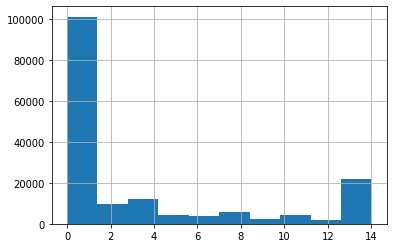

In [233]:
ranked_by_cliche_df.num_similar_lyrics.hist()

## 2. Aggregate on each song

### Average cliche-ness per lyric

In [235]:
average_lyric_clicheness_score = ranked_by_cliche_df.groupby('song_id').agg('mean').sort_values(by='num_similar_lyrics')

average_lyric_clicheness_score


,chart_debut_date_as_a_decimal,num_similar_lyrics
song_id,,
Chariots Of Fire - TitlesVangelis,1981.95,0.000000
"Fly, Robin, FlySilver Convention",1975.78,0.000000
She's Out Of My LifeMichael Jackson,1980.30,0.000000
Wipe OutThe Surfaris,1963.47,0.000000
Best Thing That Ever Happened To MeGladys Knight And The Pips,1974.13,0.058824
...,...,...
Baby BoyBeyonce Featuring Sean Paul,2003.62,13.263158
UnforgettableFrench Montana Featuring Swae Lee,2017.33,13.448980
Candy Shop50 Cent Featuring Olivia,2005.10,13.530612


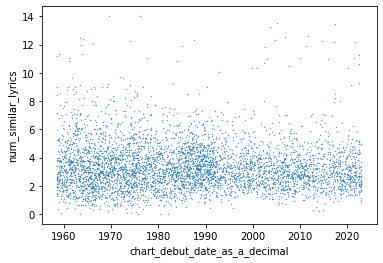

In [241]:
average_lyric_clicheness_score.plot.scatter(x = 'chart_debut_date_as_a_decimal', y = 'num_similar_lyrics', s = 0.1);

<AxesSubplot:>

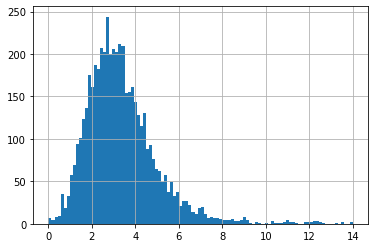

In [242]:
average_lyric_clicheness_score.num_similar_lyrics.hist(bins=100)

# Export it (so we don't have to re-do computations every time we use the notebook)

In [244]:
with_similar_indexes = lyric_lines_ready_for_analysis.copy()
with_similar_indexes
indexes_similar = with_similar_indexes.apply(
    lambda row: list_closest_lyric_indexes_for_lyric_index(row.name), 
    axis=1
)

with_similar_indexes['similar_lyric_indices'] = indexes_similar
with_similar_indexes

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,similar_lyric_indices
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,"[140563, 140542, 93272, 105020, 60697, 146932,..."
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,"[8608, 53329, 76150, 86708, 137813, 76135, 120..."
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,[]
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,"[42847, 97547, 101722, 119746, 104908, 119764,..."
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,[]
...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,[80996]
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,[]
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,"[15842, 26791, 50160, 73582, 73597]"
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,[]


In [245]:
with_similar_indexes.to_csv('./data/8-OUTPUT-lyric-lines-with-similar-lyric-index.csv', index=False)